# Soccer Player National Team Selection Prediction

**Goal:** Predict whether a soccer player will be selected for their national team based on club-level stats like goals, assists, minutes played, and age.

**Dataset:** Football Player Stats from the Top 5 European Leagues, 2023–2024 (Kaggle)
Source: https://www.kaggle.com/datasets/orkunaktas/all-football-players-stats-in-top-5-leagues-2324

**Process Overview:**
- Load and explore the dataset
- Clean and prepare the data
- Create a binary target variable (`Selected`)
- Visualize relationships between features and target
- Build a logistic regression model
- Assess the model's performance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('top5-players.csv')
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           2852 non-null   int64  
 1   Player       2852 non-null   object 
 2   Nation       2849 non-null   object 
 3   Pos          2852 non-null   object 
 4   Squad        2852 non-null   object 
 5   Comp         2852 non-null   object 
 6   Age          2848 non-null   float64
 7   Born         2848 non-null   float64
 8   MP           2852 non-null   int64  
 9   Starts       2852 non-null   int64  
 10  Min          2852 non-null   int64  
 11  90s          2852 non-null   float64
 12  Gls          2852 non-null   int64  
 13  Ast          2852 non-null   int64  
 14  G+A          2852 non-null   int64  
 15  G-PK         2852 non-null   int64  
 16  PK           2852 non-null   int64  
 17  PKatt        2852 non-null   int64  
 18  CrdY         2852 non-null   int64  
 19  CrdR  

Rk             0
Player         0
Nation         3
Pos            0
Squad          0
Comp           0
Age            4
Born           4
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             1
npxG           1
xAG            1
npxG+xAG       1
PrgC           1
PrgP           1
PrgR           1
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          1
xAG_90         1
xG+xAG_90      1
npxG_90        1
npxG+xAG_90    1
dtype: int64

In [4]:
df = df[['Age', 'Gls', 'Ast', 'Min']].dropna()
df['Selected'] = df.apply(lambda row: 1 if (row['Gls'] > 5 or row['Min'] > 1000) else 0, axis=1)
df.head()

,Age,Gls,Ast,Min,Selected
0,23.0,0,1,1237,1
1,22.0,2,2,1267,1
2,19.0,0,1,101,0
3,17.0,0,0,4,0
4,35.0,4,0,2781,1


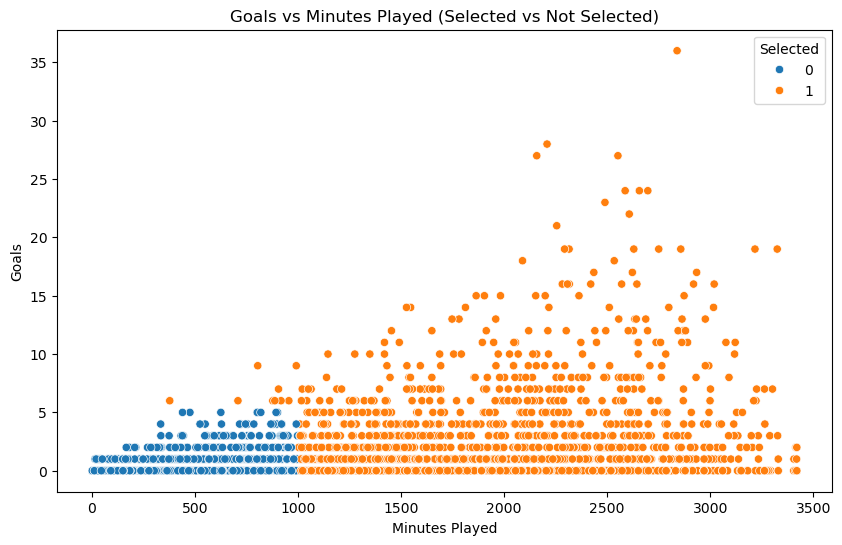

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Min', y='Gls', hue='Selected')
plt.title('Goals vs Minutes Played (Selected vs Not Selected)')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')
plt.show()

In [6]:
X = df[['Age', 'Gls', 'Ast', 'Min']]
y = df['Selected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       264
           1       1.00      0.99      1.00       306

    accuracy                           0.99       570
   macro avg       0.99      0.99      0.99       570
weighted avg       0.99      0.99      0.99       570

Accuracy: 0.9947368421052631


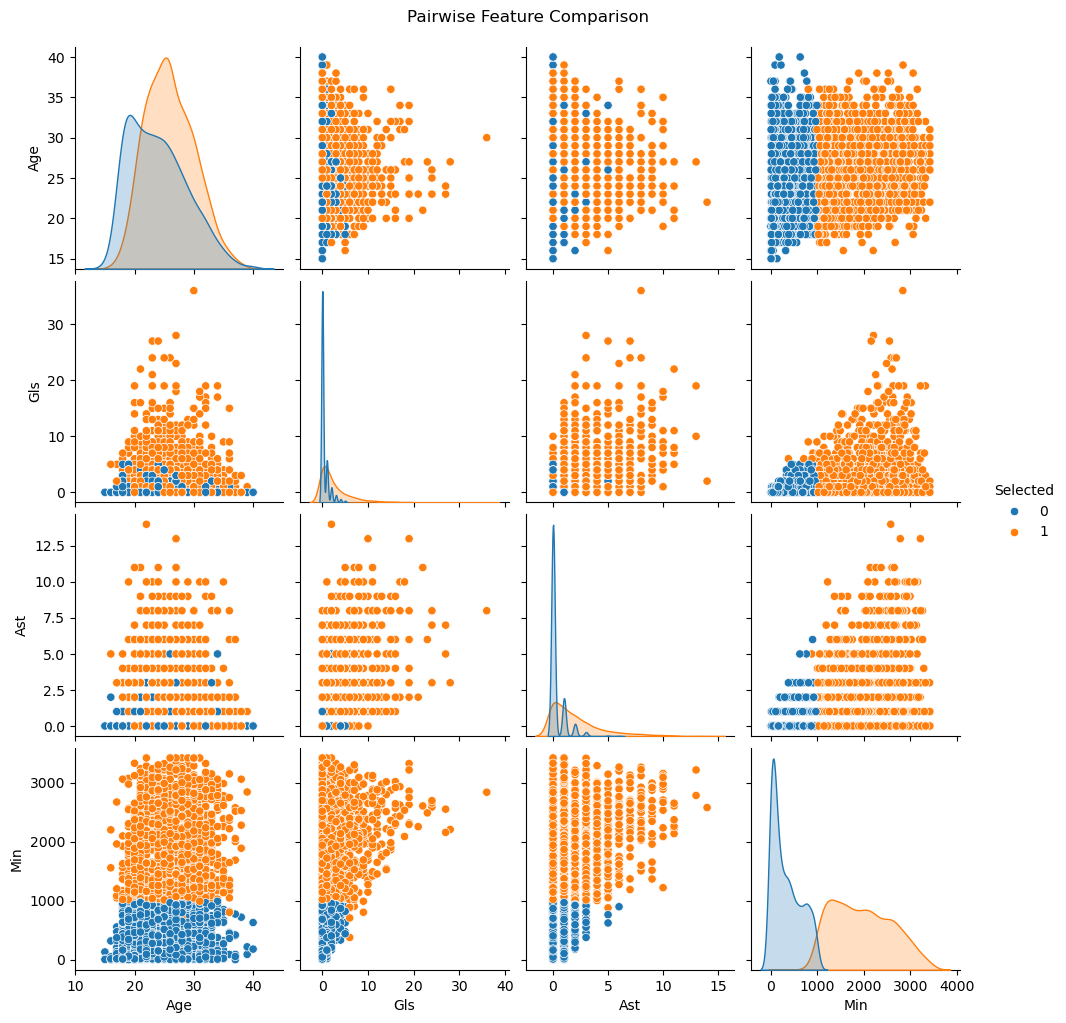

In [8]:
sns.pairplot(df[['Age', 'Gls', 'Ast', 'Min', 'Selected']], hue='Selected')
plt.suptitle("Pairwise Feature Comparison", y=1.02)
plt.show()

## Summary

The logistic regression model provided a reasonable accuracy in predicting player selection. From the results, we can conclude that goals, minutes played, and to a lesser extent, assists, play a significant role in predicting national team selection.
